# Part 1 ‑ Exploratory data analysis

In [109]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [110]:
df=pd.read_json('logins.json') 
  

In [111]:
df['login_count'] = 1
df = df.set_index(pd.to_datetime(df['login_time'], unit='s'))[['login_count']]
df.head()

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [112]:
df_15M = df.resample('15Min').sum()
df_15M

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [113]:
df_daily= df.resample('D').sum()
df_weekday = df.resample('B').sum()
df_fri = df.resample('W-FRI').sum()
df_sat = df.resample('W-SAT').sum()
df_sun = df.resample('W-SUN').sum()

<BarContainer object of 16 artists>

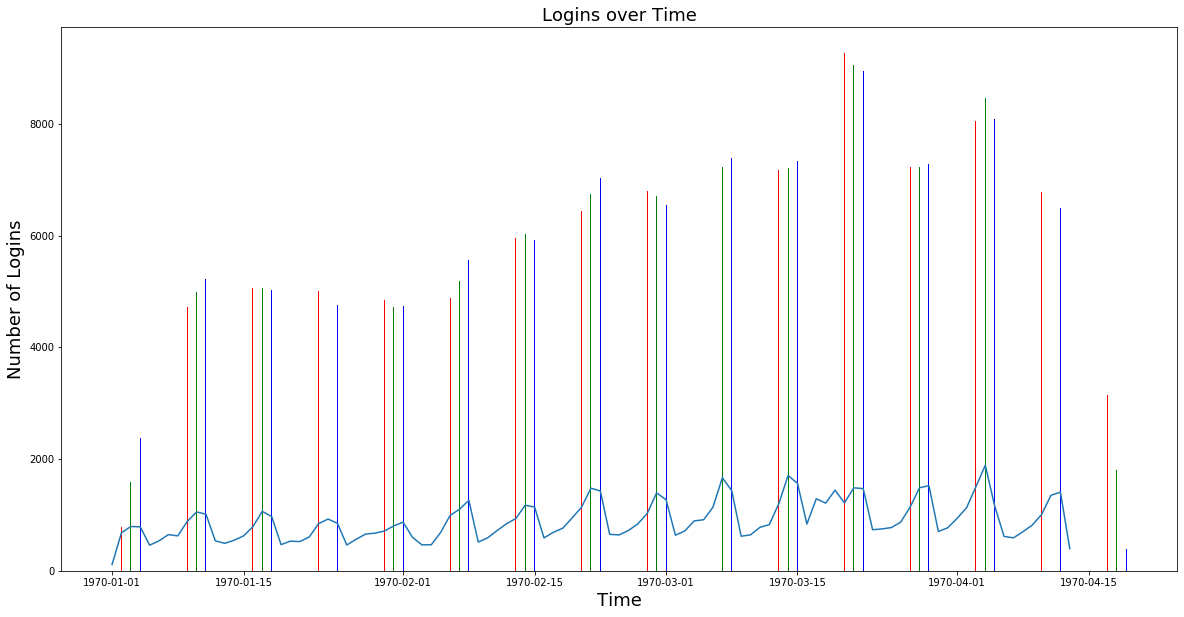

In [114]:
fig, ax = plt.subplots(figsize = (20,10))
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Number of Logins', fontsize = 18)
plt.title('Logins over Time', fontsize = 18)

plt.plot(df_daily.index, df_daily.login_count, label = 'Daily Frequencies')

plt.bar(df_fri.index, df_fri.login_count, align= 'center', width = 0.1, label = "Fridays", color = 'r')
plt.bar(df_sat.index, df_sat.login_count, align= 'center', width = 0.1, label = "Saturdays", color = 'g')
plt.bar(df_sun.index, df_sun.login_count, align= 'center', width = 0.1, label = "Sundays", color = 'b')

As seen in the above chart, the number of logins peaks over the weekends and hence weekends are more busier than weekdays

In [115]:
df_hr_logins=df.resample('H').sum()
df_hr_logins

,login_count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53
...,...
1970-04-13 14:00:00,32
1970-04-13 15:00:00,19
1970-04-13 16:00:00,22


In [116]:
df['day_of_week'] = list(df.index.dayofweek)

In [117]:
df['hour'] = [time.hour for time in df.index]
df

,login_count,day_of_week,hour
login_time,,,
1970-01-01 20:13:18,1,3,20
1970-01-01 20:16:10,1,3,20
1970-01-01 20:16:37,1,3,20
1970-01-01 20:16:36,1,3,20
1970-01-01 20:26:21,1,3,20
...,...,...,...
1970-04-13 18:50:19,1,0,18
1970-04-13 18:43:56,1,0,18
1970-04-13 18:54:02,1,0,18


In [121]:
df_a=df
df_a.reset_index(drop=True, inplace=True)
df_a


,login_count,day_of_week,hour
0,1,3,20
1,1,3,20
2,1,3,20
3,1,3,20
4,1,3,20
...,...,...,...
93137,1,0,18
93138,1,0,18
93139,1,0,18
93140,1,0,18


In [131]:
df_b=df_a.groupby(['day_of_week','hour']).sum()
df_b.reset_index(inplace= True)
df_b

,day_of_week,hour,login_count
0,0,0,531
1,0,1,414
2,0,2,312
3,0,3,236
4,0,4,206
...,...,...,...
163,6,19,632
164,6,20,612
165,6,21,625
166,6,22,583


In [133]:
df_b['day_of_week']=df_b['day_of_week'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
df_b

,day_of_week,hour,login_count
0,Monday,0,531
1,Monday,1,414
2,Monday,2,312
3,Monday,3,236
4,Monday,4,206
...,...,...,...
163,Sunday,19,632
164,Sunday,20,612
165,Sunday,21,625
166,Sunday,22,583


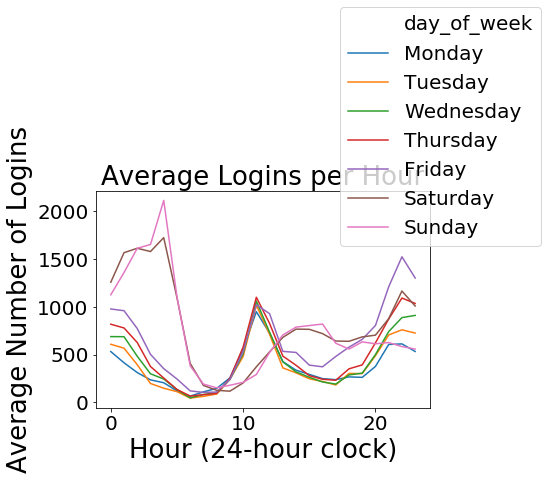

In [144]:
sns.lineplot(x='hour', y='login_count', data=df_b, 
            hue='day_of_week', legend='brief')
ax = plt.gca()
ax.set_title('Average Logins per Hour', fontsize = 26)
ax.set_xlabel('Hour (24-hour clock)', fontsize = 26)
ax.set_ylabel('Average Number of Logins', fontsize = 26)
ax.tick_params(labelsize=20,labelcolor="black")
ax.legend(bbox_to_anchor=(0.7,0.7,0.1, 0.2),fontsize=20)

As seen, logins during weekdays peak around 10 am and then again around 10 pm whereas on the weekends , most logins are seen late into the night from 9pm to 5 am.

# Part 2 ‑ Experiment and metrics design

The key measure for success would be to check the traffic before and after the tolls are removed. This can be done by conducting a Hypothesis test for both the cities where:
H0: There is no difference in traffic for Metropolis/Gotham before and after the tolls were removed
H1: There is a significant difference in traffic for Metropolis/Gotham before and after the tolls were removed

In the hypothesis testing we will only reject the null if p-value is less that 0.05 for both cities. If thats the case, we shall reimburse the toll amounts
 If we accept the null hypothesis, then we need to find another way to attract traffic between both cities.

 # Part 3 ‑ Predictive modeling

In [154]:
df_2=pd.read_json('ultimate_data_challenge.json') 

In [155]:
df_2['signup_date']=pd.to_datetime(df_2['signup_date'])
df_2['last_trip_date']=pd.to_datetime(df_2['last_trip_date'])

In [156]:
pull_date = df_2.last_trip_date.max()
cut_off_day = pull_date - pd.Timedelta('30 days')
df_2['active_status'] = (df_2.last_trip_date > cut_off_day).astype('int')
df_2 = pd.get_dummies(df_2, columns = ['city', 'phone'])


In [157]:
df_2

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_status,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2014-01-25,5.0,1.00,2014-06-05,0.0,False,100.0,5.63,4.2,1,0,1,0,0,1
49996,1,2014-01-24,NaN,1.00,2014-01-25,0.0,False,0.0,0.00,4.0,0,1,0,0,0,1
49997,0,2014-01-31,5.0,1.00,2014-05-22,0.0,True,100.0,3.86,5.0,0,0,0,1,1,0
49998,2,2014-01-14,3.0,1.00,2014-01-15,0.0,False,100.0,4.58,3.5,0,1,0,0,0,1


In [160]:
active_user = df_2[df_2.active_status == 1]
inactive_user = df_2[df_2.active_status == 0]
fraction = round((len(active_user.active_status)/len(df_2.active_status)) * 100, 2)
print('{} percent of users were retained.'.format(fraction))

36.62 percent of users were retained.


In [162]:
feature_columns = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'city_Astapor',
 "city_King's Landing", 'city_Winterfell', 'phone_Android','phone_iPhone']
stats_dict = {}
for col in feature_columns:
    stats_dict[col] = [active_user[col].mean(), active_user[col].std(),
                       inactive_user[col].mean(),inactive_user[col].std()]
stats_df = pd.DataFrame.from_dict(stats_dict, orient='index').rename(columns = {0:'active_mean', 1:'active_std', 2:'inactive_mean', 3:'inactive_std'})

Text(0.5, 1.0, 'Average of Features for Active and Inactive Users')

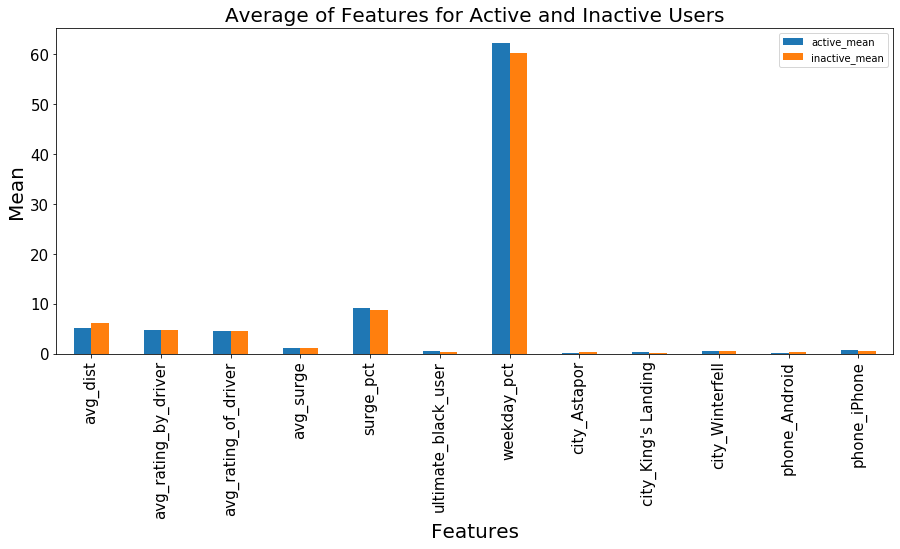

In [163]:
stats_df[['active_mean', 'inactive_mean']].plot(kind = 'bar', yerr=stats_df[['active_std','inactive_std']], figsize = (15,6), fontsize = 15)
plt.xlabel('Features',fontsize = 20)
plt.ylabel('Mean', fontsize = 20)
plt.title('Average of Features for Active and Inactive Users', fontsize = 20)
